# TDx Data Pull

**Author:** Eric Englin

**Date:** 10/10/23

**Description:** This code will pull the latest NPS API for the TDx feed. It will create a quick summary figure of the data. 

In [1]:
#import packages
import requests
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import datetime


In [19]:
#pull API using API key
response_API = requests.get('https://developer.nps.gov/api/v1/roadevents?api_key=3AidKP0PiqgfP8sbwZC0RZ9JM6QDnvYaZx3RRjrH')
#print(response_API.status_code)
data = response_API.text
df = json.loads(data)

In [20]:
#summarize the data by park
park_list = []
for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            park_list.append(y['organization_name'])

park_df = Counter(park_list)
park_df = pd.DataFrame.from_dict(park_df, orient="index").reset_index().rename(
    columns={'index': 'park',
            0:'number of alerts'}).sort_values(by=['number of alerts'])


In [21]:
# Get today's date as a string
today = datetime.date.today()
today_string = today.strftime('%Y-%m-%d')

park_df['date'] = today_string

In [22]:
today_string

'2024-02-27'

In [23]:
len(park_df), sum(park_df['number of alerts']), max(park_df['number of alerts'])

(17, 77, 20)

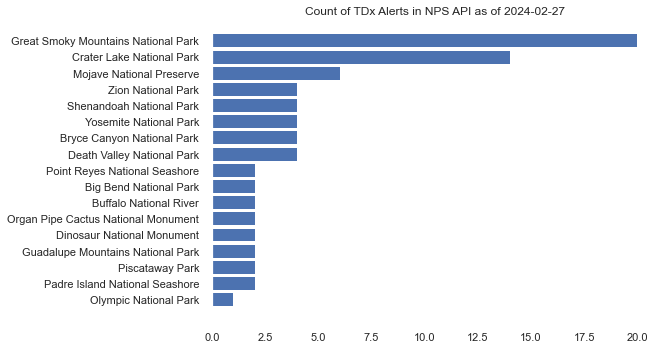

In [24]:
#create a quick summary figure


# Create the plot
plt.barh(park_df['park'], park_df['number of alerts'])

# Set the title
plt.title("Count of TDx Alerts in NPS API as of " + today_string)

# Show the chart
plt.show()


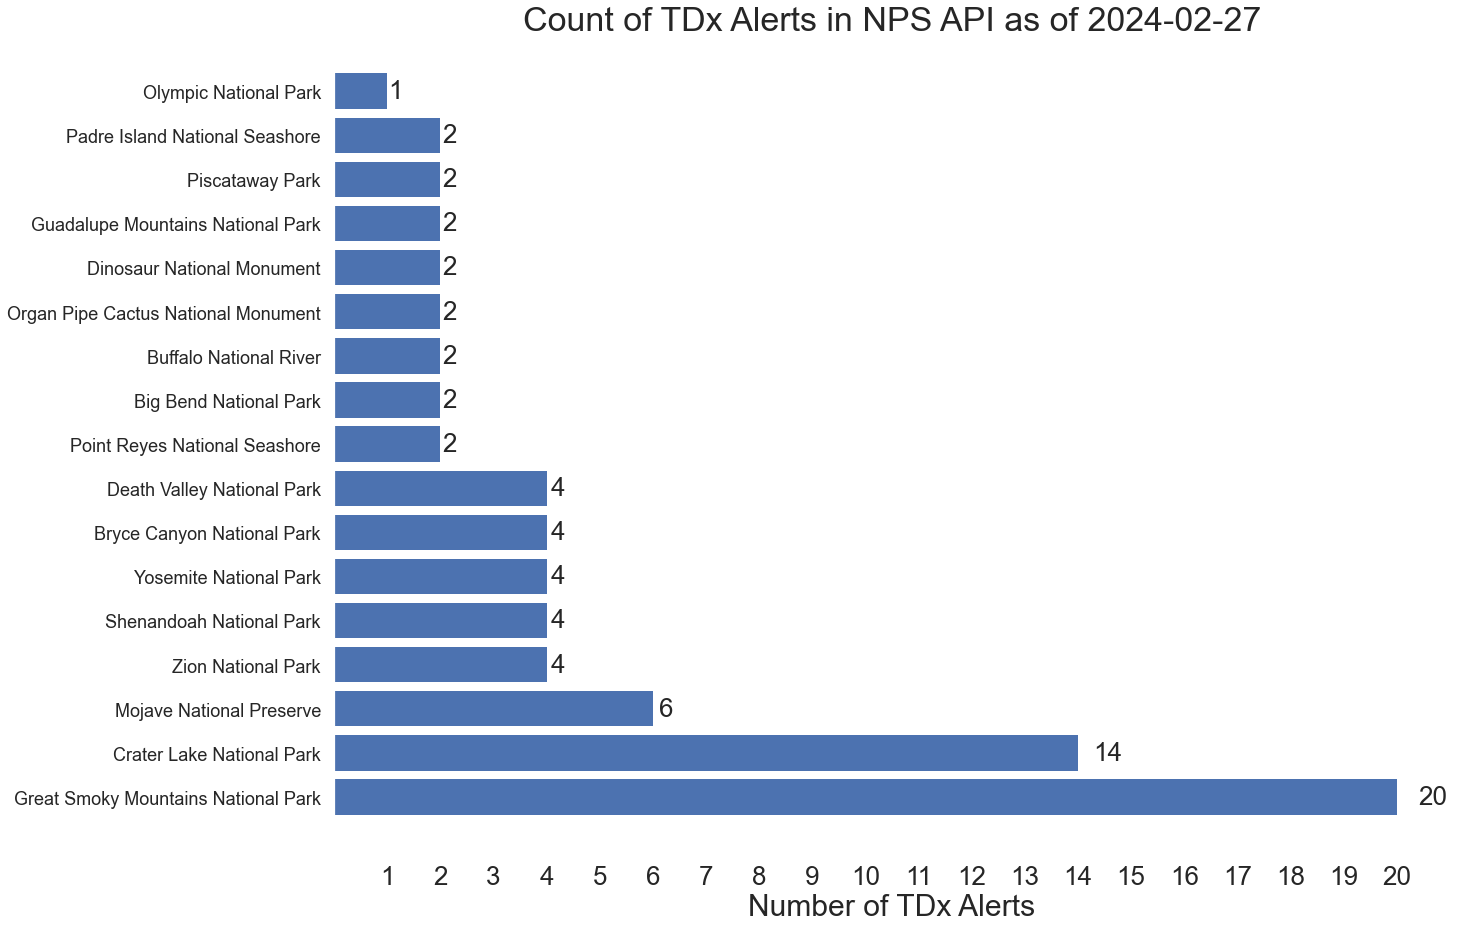

In [25]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = park_df['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = park_df['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(park_df['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [27]:
# Loop through the API entries
counter=0

park_list = []
alert_name_list = []
description_list = []
event_type_list = []
road_name_list = []
vehicle_impact_list = []
start_date_list = []
end_date_list = []
today_date_list = []


for x in df["features"]:
    for y in df["road_event_feed_info"]['data_sources']:
        if y['data_source_id']==x['properties']['core_details']['data_source_id']:
            print("Park:", y['organization_name'])
            park_list.append(y['organization_name'])
    print("Alert name: ", x['properties']['core_details']['name'])
    print("Description: ", x['properties']['core_details']['description'])
    print("Event type: ", x['properties']['core_details']['event_type'])
    print("Road name: ", x['properties']['core_details']['road_names'])
    print("Vehicle impact: ", x['properties']['vehicle_impact'])
  #  print("Dates: ", x['properties']['start_date'], "to ", x['properties']['end_date'])
    print("")
    alert_name_list.append(x['properties']['core_details']['name'])
    description_list.append(x['properties']['core_details']['description'])
    event_type_list.append(x['properties']['core_details']['event_type'])
    road_name_list.append(x['properties']['core_details']['road_names'])
    vehicle_impact_list.append(x['properties']['vehicle_impact'])
    start_date_list.append(x['properties']['start_date'])
   # end_date_list.append(x['properties']['end_date'])
    today_date_list.append(today_string)
    counter+=1

Park: Crater Lake National Park
Alert name:  Road from Park HQ to Rim Village CLOSED
Description:  Road from park headquarters to Rim Village is temporarily closed due to the latest snowstorm.  
Event type:  incident
Road name:  ['Munson Valley Road HQ to Rim Village']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Road from Park HQ to Rim Village CLOSED
Description:  Road from park headquarters to Rim Village is temporarily closed due to the latest snowstorm.  
Event type:  incident
Road name:  ['Munson Valley Road HQ to Rim Village']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Seasonal Road Closure
Description:  North Entrance Road, West Rim Drive, and East Rim Drive are CLOSED for the season.  
Event type:  incident
Road name:  ['North Entrance Road', 'East Rim Drive', 'Pinnacles Road', 'Grayback Road', 'West Rim Drive']
Vehicle impact:  all-lanes-closed

Park: Crater Lake National Park
Alert name:  Seasonal Road C

In [28]:
df_update = pd.DataFrame({
    "date":today_date_list,
    "park":park_list,
    "alert name": alert_name_list,
    "description": description_list,
    "event type": event_type_list,
    "road name": road_name_list,
    "vehicle impact": vehicle_impact_list,
    "event start date": start_date_list,
#    "event end date": end_date_list
})

In [29]:
df_old_update = pd.read_csv("./TDx_tracker.csv")

In [30]:
df_update = pd.concat([df_update, df_old_update])

In [31]:
df_update.shape

(145, 9)

In [32]:
df_update.columns

Index(['date', 'park', 'alert name', 'description', 'event type', 'road name',
       'vehicle impact', 'event start date', 'event end date'],
      dtype='object')

In [33]:
df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()



,park,date,alert name,number of alerts,event type,road name,vehicle impact,event start date,event end date
0,Muir Woods National Monument,1,1,1,1,1,1,1,1
1,Guadalupe Mountains National Park,2,2,2,2,2,2,2,0
2,Big Bend National Park,2,2,2,2,2,2,2,0
3,Point Reyes National Seashore,2,2,2,2,2,2,2,0
4,Buffalo National River,2,2,2,2,2,2,2,0
5,Piscataway Park,2,2,2,2,2,2,2,0
6,Organ Pipe Cactus National Monument,2,2,2,2,2,2,2,0
7,Natchez Trace Parkway,4,4,4,4,4,4,4,4
8,Zion National Park,4,4,4,4,4,4,4,0
9,Dinosaur National Monument,4,4,4,4,4,4,4,2


In [34]:
df_update_agg = df_update.groupby('park').count().rename(
    columns={'index': 'park',
            "description":'number of alerts'}).sort_values(by=['number of alerts']).reset_index()


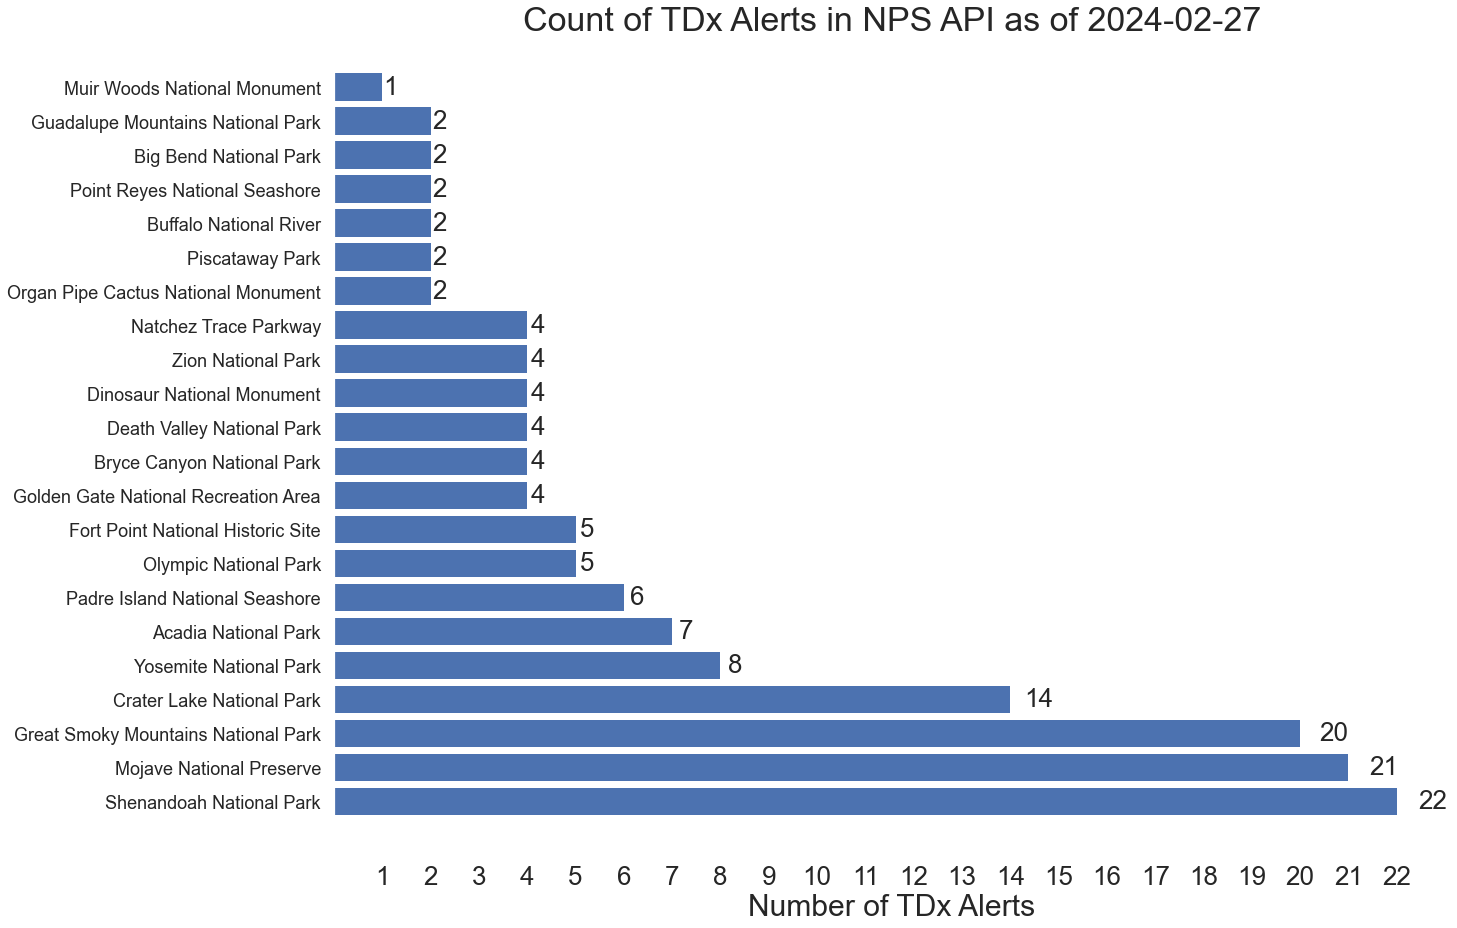

In [35]:
import matplotlib.ticker as ticker
import seaborn as sns 

plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})


bar_labels = df_update_agg['park']

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26, rotation = 45)
title = "Count of TDx Alerts in NPS API as of " + today_string
ax.set_title(title, fontsize=34)

bars = ax.barh(width = df_update_agg['number of alerts'], y = bar_labels)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of TDx Alerts',fontsize = 30) #xlabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)

plt.xticks(range(1,max(df_update_agg['number of alerts'])+1))

for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)



plt.show()

In [36]:
df_update.to_csv("./TDx_tracker.csv", index=False)